In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


```
Column Name,Description
Src_Player_Id,Unique Player Identifier
Signup_Date,Date of Registration
acquisition_channel,Channel of Acquisition
src_advertiser_id,ID of advertiser from where the player was acquired
Gender,Gender
Date_Of_Birth,Date of Birth
Internal_Player_YN,Test Account Flag (Needs to be excluded for analysis)
```


## EDA & Data Cleaning

In [2]:
df_player = pd.read_excel('/content/Player_Details.xlsx')
df_player.head()

,Src_Player_Id,Signup_Date,acquisition_channel,src_advertiser_id,Gender,Date_Of_Birth,Internal_Player_YN
0,12584958,2019-02-23 17:24:49,NaN,999999.0,M,1991-08-05,N
1,12356925,2019-01-07 15:57:11,NaN,999999.0,M,1993-09-09,N
2,12500831,2019-02-10 08:31:13,NaN,999999.0,M,1971-10-15,N
3,12660009,2019-03-12 09:42:53,NaN,999999.0,M,2000-12-15,N
4,12447120,2019-01-28 09:53:42,NaN,999999.0,M,1994-03-07,N


In [3]:
df_player.columns = df_player.columns.str.lower()

In [4]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292785 entries, 0 to 292784
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   src_player_id        292785 non-null  int64         
 1   signup_date          292785 non-null  datetime64[ns]
 2   acquisition_channel  201279 non-null  object        
 3   src_advertiser_id    290719 non-null  float64       
 4   gender               292774 non-null  object        
 5   date_of_birth        292785 non-null  datetime64[ns]
 6   internal_player_yn   292785 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 15.6+ MB


In [5]:
df_player['gender'].value_counts()

,count
gender,
M,221261
F,71513


In [6]:
df_player['acquisition_channel'].value_counts()

,count
acquisition_channel,
Affiliate,98324
PPC,82961
Social,10514
Others,5288
Retail,3690
Display,491
Programatic,8
Email,2
Content,1


In [7]:
df_player.isnull().sum()

,0
src_player_id,0
signup_date,0
acquisition_channel,91506
src_advertiser_id,2066
gender,11
date_of_birth,0
internal_player_yn,0


Deriving age of each player

In [8]:
from datetime import date
df_player['age'] = date.today().year - df_player['date_of_birth'].dt.year
df_player.head()

,src_player_id,signup_date,acquisition_channel,src_advertiser_id,gender,date_of_birth,internal_player_yn,age
0,12584958,2019-02-23 17:24:49,NaN,999999.0,M,1991-08-05,N,34
1,12356925,2019-01-07 15:57:11,NaN,999999.0,M,1993-09-09,N,32
2,12500831,2019-02-10 08:31:13,NaN,999999.0,M,1971-10-15,N,54
3,12660009,2019-03-12 09:42:53,NaN,999999.0,M,2000-12-15,N,25
4,12447120,2019-01-28 09:53:42,NaN,999999.0,M,1994-03-07,N,31



```
Column Name,Description
src_player_id,Unique Player Identifier
ActivityMonth,Month where a player was active (placed a bet) [Month end date shown here]
Product,Product on which the player is betting. Sportsbook is sports betting; eGaming is Casino games betting
SubProduct,"Livebook: Live betting which is available only after a Match has started; Prematch: A player can place a bet even before the match has started; Table Games: Casino games that are played on a table. Example: Roulette, Blackjack; Non-Table Games: Slot machines"
ActivePlayerDays,#Days the player is active (placed a bet)
Bet_Amount,Bet amount placed by the player
Win_Amount,Amount won by the player
Gross_Win,= Bet amount - Win Amount [Positive Gross Win means business has made money]
Net_Gross_Win,= Bet amount - Win Amount - Taxes
Net Gross Revenue (NGR) = Net Gross Win - Bonus Cost [Amount which the business makes after deducting taxes and bonuses,
```


In [9]:
df_activity = pd.read_excel('/content/Player_Activity_Data.xlsx')
df_activity.head()

,src_player_id,ActivityMonth,Product,SubProduct,ActivePlayerDays,Bet_Amount,Win_Amount,Gross_Win,Net_Gross_Win
0,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
1,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
2,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
3,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
4,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616


In [10]:
df_activity.columns = df_activity.columns.str.lower()
df_activity.rename(columns={'activitymonth':'activity_month','subproduct':'sub_product',
                            'activeplayerdays':'active_player_days',
                            },inplace=True)

In [ ]:
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860230 entries, 0 to 860229
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   src_player_id       860230 non-null  int64         
 1   activity_month      860230 non-null  datetime64[ns]
 2   product             860230 non-null  object        
 3   sub_product         860230 non-null  object        
 4   active_player_days  860230 non-null  int64         
 5   bet_amount          860230 non-null  float64       
 6   win_amount          860230 non-null  float64       
 7   gross_win           860230 non-null  float64       
 8   net_gross_win       860230 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 59.1+ MB


lets check for users who have active days as 0 and bet amount, win amount, gross win and net gross win as 0

In [ ]:
df_activity.shape

(860230, 9)

In [ ]:
temp = df_activity[(df_activity['active_player_days'] == 0) & (df_activity['bet_amount'] == 0) & (df_activity['win_amount'] == 0) & (df_activity['gross_win'] == 0)]
temp.head()

,src_player_id,activity_month,product,sub_product,active_player_days,bet_amount,win_amount,gross_win,net_gross_win


Bet_Amount- Bet amount placed by the player

Win_Amount - Amount won by the player

Gross_Win = Bet amount - Win Amount [Positive Gross Win means business has made money]

Net_Gross_Win = Bet amount - Win Amount - Taxes

Net Gross Revenue (NGR) = Net Gross Win - Bonus Cost [Amount which the business makes after deducting taxes and bonuses]

In [11]:
df_deposit = pd.read_excel('/content/First_Deposit_Data.xlsx')
df_deposit.head()

,Src_Player_Id,First_Deposit_Date,First_Deposit_Channel,First_Deposit_Method,First_Deposit_Amount
0,13472812,NaT,NaN,NaN,NaN
1,13331793,NaT,NaN,NaN,NaN
2,13116242,NaT,NaN,NaN,NaN
3,12689016,NaT,NaN,NaN,NaN
4,12681525,NaT,NaN,NaN,NaN


In [12]:
df_deposit.columns = df_deposit.columns.str.lower()

In [13]:
df_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292785 entries, 0 to 292784
Data columns (total 5 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   src_player_id          292785 non-null  int64         
 1   first_deposit_date     127261 non-null  datetime64[ns]
 2   first_deposit_channel  127261 non-null  object        
 3   first_deposit_method   127261 non-null  object        
 4   first_deposit_amount   127261 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 11.2+ MB


In [14]:
df_deposit.isnull().sum()

,0
src_player_id,0
first_deposit_date,165524
first_deposit_channel,165524
first_deposit_method,165524
first_deposit_amount,165524


In [15]:
df_deposit.dropna(inplace=True)

In [16]:
df_deposit.isnull().sum()

,0
src_player_id,0
first_deposit_date,0
first_deposit_channel,0
first_deposit_method,0
first_deposit_amount,0


In [17]:
df_deposit.head()

,src_player_id,first_deposit_date,first_deposit_channel,first_deposit_method,first_deposit_amount
6848,20424535,2021-06-05 12:59:49,Online,VISA,50.0
6850,20538009,2021-06-16 17:59:20,Online,MC,50.0
6853,16605812,2020-08-08 14:56:53,Online,MC,25.0
6857,20528494,2021-06-15 20:46:26,Online,VISA,25.0
6864,14918789,2020-02-07 17:35:06,Online,VISA,25.0


In [ ]:
len(df_deposit)

127261

In [18]:
df_bet = pd.read_excel('/content/First_Bet_Data.xlsx')
df_bet.head()

,Src_Player_Id,System_First_Bet_Datetime,System_First_BetSlip_Amt,System_First_Bet_Product_Group,System_First_Bet_Product,System_First_Bet_Channel,System_First_Bet_Platform
0,15643431,2020-10-09 03:57:29.000,2.5,eGaming,Non Table Games,Online,Mobile
1,13593034,2019-09-27 15:03:58.244,10.0,Sports,Prematch,Online,Mobile
2,15894194,2021-02-28 02:22:07.000,2.0,eGaming,Non Table Games,Online,Web
3,13238000,2019-07-08 10:39:45.000,0.4,eGaming,Non Table Games,Online,Mobile
4,12866848,2019-04-27 14:20:27.000,0.4,eGaming,Non Table Games,Online,Mobile


In [19]:
df_bet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292785 entries, 0 to 292784
Data columns (total 7 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Src_Player_Id                   292785 non-null  int64         
 1   System_First_Bet_Datetime       159166 non-null  datetime64[ns]
 2   System_First_BetSlip_Amt        159166 non-null  float64       
 3   System_First_Bet_Product_Group  159166 non-null  object        
 4   System_First_Bet_Product        159166 non-null  object        
 5   System_First_Bet_Channel        159166 non-null  object        
 6   System_First_Bet_Platform       159166 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 15.6+ MB


In [20]:
df_bet.columns = df_bet.columns.str.lower()

In [21]:
df_bet.isnull().sum()

,0
src_player_id,0
system_first_bet_datetime,133619
system_first_betslip_amt,133619
system_first_bet_product_group,133619
system_first_bet_product,133619
system_first_bet_channel,133619
system_first_bet_platform,133619


In [22]:
df_bet.dropna(inplace=True)

In [23]:
df_bet.isnull().sum()

,0
src_player_id,0
system_first_bet_datetime,0
system_first_betslip_amt,0
system_first_bet_product_group,0
system_first_bet_product,0
system_first_bet_channel,0
system_first_bet_platform,0


In [ ]:
len(df_bet)

159166

In [24]:
df_bonus = pd.read_excel('/content/BonusCost_Data.xlsx')
df_bonus.head()

,Src_PLAYER_ID,ActivityMonth,Product,BONUS_COST
0,16051927,2020-06-30,eGaming,50.0
1,19309540,2021-02-28,eGaming,40.0
2,13176431,2020-01-31,eGaming,15.0
3,12405628,2019-02-28,SportsBook,30.0
4,17486248,2021-02-28,eGaming,25.0


In [25]:
df_bonus.columns = df_bonus.columns.str.lower()

In [26]:
df_bonus.rename(columns={'activitymonth':'activity_month'},inplace=True)

In [27]:
df_bonus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207070 entries, 0 to 207069
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   src_player_id   207070 non-null  int64         
 1   activity_month  207070 non-null  datetime64[ns]
 2   product         207070 non-null  object        
 3   bonus_cost      207070 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.3+ MB


In [28]:
df_bonus.isnull().sum()

,0
src_player_id,0
activity_month,0
product,0
bonus_cost,0


In [29]:
df_player['age'].describe()

,age
count,292785.000000
mean,36.426617
std,11.502467
min,4.000000
25%,27.000000
50%,34.000000
75%,43.000000
max,125.000000


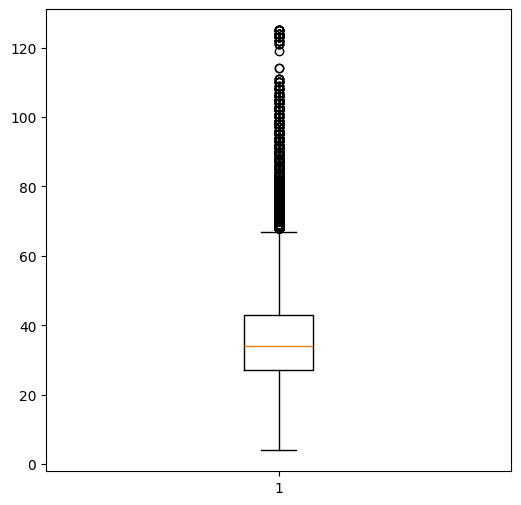

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
plt.boxplot(df_player['age'])
plt.show()

lets check how many users are below the age of 21

In [30]:
df_player[df_player['age'] < 21]

,src_player_id,signup_date,acquisition_channel,src_advertiser_id,gender,date_of_birth,internal_player_yn,age
28727,15627750,2020-04-27 22:23:32,NaN,NaN,M,2020-04-27 22:23:54,Y,5
28787,14917906,2020-02-07 14:31:53,NaN,NaN,M,2020-02-07 14:31:53,Y,5
49730,19615920,2021-03-23 09:16:48,NaN,NaN,M,2021-03-23 09:18:02,Y,4
77448,14934148,2020-02-10 11:59:24,NaN,NaN,M,2020-02-10 11:59:24,Y,5
122894,18771266,2021-01-15 10:36:54,NaN,NaN,M,2021-01-15 10:37:36,Y,4
156035,15627719,2020-04-27 22:20:26,NaN,NaN,M,2020-04-27 22:20:48,Y,5
178569,15627735,2020-04-27 22:22:41,NaN,NaN,M,2020-04-27 22:22:51,Y,5
178629,14915831,2020-02-07 02:30:16,NaN,NaN,M,2020-02-07 02:30:16,Y,5
227585,15627713,2020-04-27 22:19:17,NaN,NaN,F,2020-04-27 22:19:40,Y,5
246173,19351847,2021-03-02 09:15:17,NaN,NaN,F,2021-03-02 09:19:04,Y,4


lets check if we have any activity for these users

In [31]:
temp = df_player[df_player['age'] < 21]
df_activity[df_activity['src_player_id'].isin(temp['src_player_id'])]

,src_player_id,activity_month,product,sub_product,active_player_days,bet_amount,win_amount,gross_win,net_gross_win


In [32]:
df_bet[df_bet['src_player_id'].isin(temp['src_player_id'])]

,src_player_id,system_first_bet_datetime,system_first_betslip_amt,system_first_bet_product_group,system_first_bet_product,system_first_bet_channel,system_first_bet_platform


In [33]:
df_deposit[df_deposit['src_player_id'].isin(temp['src_player_id'])]

,src_player_id,first_deposit_date,first_deposit_channel,first_deposit_method,first_deposit_amount


None of the tables have data for these records so we can remove records for users under age 21. So we can get rid of this data

In [34]:
df_player = df_player[df_player['age'] >= 21]

lets check for records where age > 80

In [35]:
temp = df_player[df_player['age'] > 80].reset_index(drop=True)
print(temp.head())

   src_player_id         signup_date acquisition_channel  src_advertiser_id  \
0       19439399 2021-03-09 12:20:13                 NaN           999999.0   
1       20052029 2021-04-28 05:02:04                 NaN           999999.0   
2       19049726 2021-02-07 23:32:44                 NaN           999999.0   
3       20585219 2021-06-20 12:28:13                 NaN           999999.0   
4       19092317 2021-02-11 13:57:41                 NaN                NaN   

  gender date_of_birth internal_player_yn  age  
0     M     1937-07-23                 N    88  
1     M     1944-09-10                 N    81  
2     F     1943-03-28                 N    82  
3     F     1943-10-11                 N    82  
4     F     1935-12-09                 Y    90  


In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   src_player_id        845 non-null    int64         
 1   signup_date          845 non-null    datetime64[ns]
 2   acquisition_channel  519 non-null    object        
 3   src_advertiser_id    695 non-null    float64       
 4   gender               845 non-null    object        
 5   date_of_birth        845 non-null    datetime64[ns]
 6   internal_player_yn   845 non-null    object        
 7   age                  845 non-null    int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(1), object(3)
memory usage: 49.6+ KB


In [36]:
df_activity[df_activity['src_player_id'].isin(temp['src_player_id'])]

,src_player_id,activity_month,product,sub_product,active_player_days,bet_amount,win_amount,gross_win,net_gross_win
244,14996830,2020-02-29,eGaming,Non Table Games,1,288.30,268.30,19.925250,16.737210
402,16819010,2020-08-31,eGaming,Non Table Games,1,0.00,0.00,0.000000,0.000000
3678,12462560,2019-01-31,eGaming,Non Table Games,1,55.00,35.70,18.755500,15.754620
4636,13052155,2019-05-31,eGaming,Non Table Games,1,898.60,798.68,97.920000,82.252800
4982,17663091,2021-04-30,SportsBook,Prematch,7,64.00,110.48,-46.480000,-39.043200
...,...,...,...,...,...,...,...,...,...
855094,17500475,2020-11-30,SportsBook,Livebook,1,443.12,365.77,77.350000,64.974000
855985,18617422,2021-01-31,SportsBook,Prematch,7,51.00,0.00,51.000000,42.840000
856515,18382950,2021-02-28,SportsBook,Prematch,1,5.00,0.00,5.000000,4.200000
858620,15958422,2021-06-30,SportsBook,Prematch,26,73.00,51.88,21.120000,17.740800


Which users above the age of 80 do not have any activity, bet and deposit data

In [37]:
ids_in_temp_not_in_all = temp[
    ~temp['src_player_id'].isin(df_activity['src_player_id']) &
    ~temp['src_player_id'].isin(df_deposit['src_player_id']) &
    ~temp['src_player_id'].isin(df_bet['src_player_id'])
]['src_player_id']

print(ids_in_temp_not_in_all)

0      19439399
1      20052029
2      19049726
3      20585219
4      19092317
         ...   
818    16311044
820    15644011
821    17443073
822    17117931
823    15824275
Name: src_player_id, Length: 474, dtype: int64


So we can filter out these users from the players data

In [38]:
players_clean = df_player[~df_player['src_player_id'].isin(ids_in_temp_not_in_all)]
print(players_clean.head())

   src_player_id         signup_date acquisition_channel  src_advertiser_id  \
0       12584958 2019-02-23 17:24:49                 NaN           999999.0   
1       12356925 2019-01-07 15:57:11                 NaN           999999.0   
2       12500831 2019-02-10 08:31:13                 NaN           999999.0   
3       12660009 2019-03-12 09:42:53                 NaN           999999.0   
4       12447120 2019-01-28 09:53:42                 NaN           999999.0   

  gender date_of_birth internal_player_yn  age  
0     M     1991-08-05                 N    34  
1     M     1993-09-09                 N    32  
2     M     1971-10-15                 N    54  
3     M     2000-12-15                 N    25  
4     M     1994-03-07                 N    31  


In [39]:
players_clean['age'].describe()

,age
count,292299.000000
mean,36.338178
std,11.283406
min,22.000000
25%,27.000000
50%,34.000000
75%,43.000000
max,125.000000


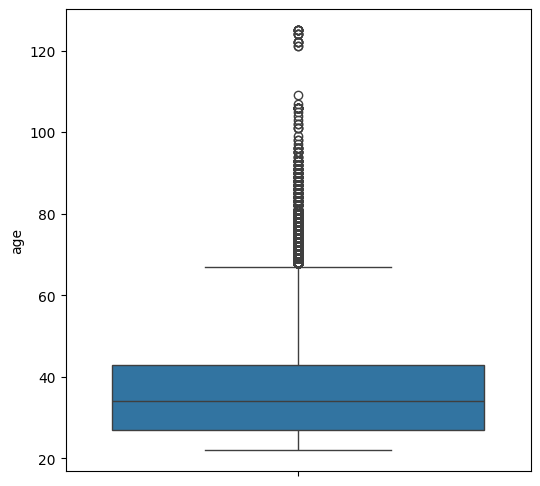

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(players_clean['age'])
plt.show()

## Male vs Female split in users

In [247]:
gender_split = players_clean['gender'].value_counts()
print(gender_split)

gender
M     221029
F      71259
Name: count, dtype: int64


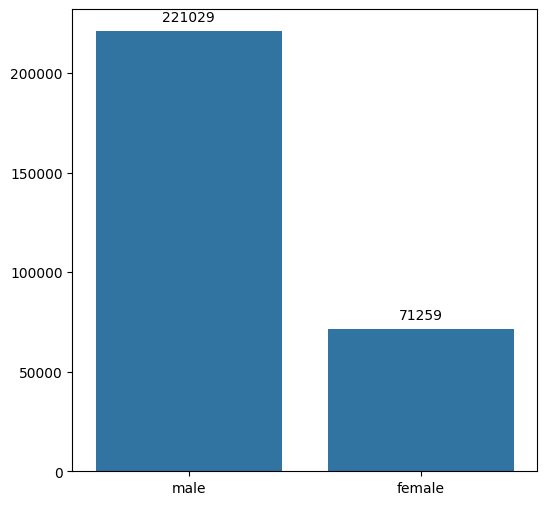

In [249]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=['male','female'],y=gender_split.values)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

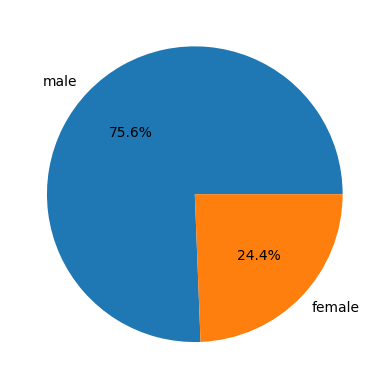

In [ ]:
plt.pie(gender_split.values,labels=['male','female'],autopct='%1.1f%%')
plt.show()

## Players in different age groups

In [87]:
bins = [0, 24, 34, 44, 54, 64, 125]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
players_clean['age_group'] = pd.cut(players_clean['age'], bins=bins, labels=labels)

<ipython-input-87-3701ef077b5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_clean['age_group'] = pd.cut(players_clean['age'], bins=bins, labels=labels)


In [88]:
players_clean['age_group'].value_counts()

,count
age_group,
25-34,121612
35-44,77041
45-54,40054
<25,30204
55-64,16010
65+,7378


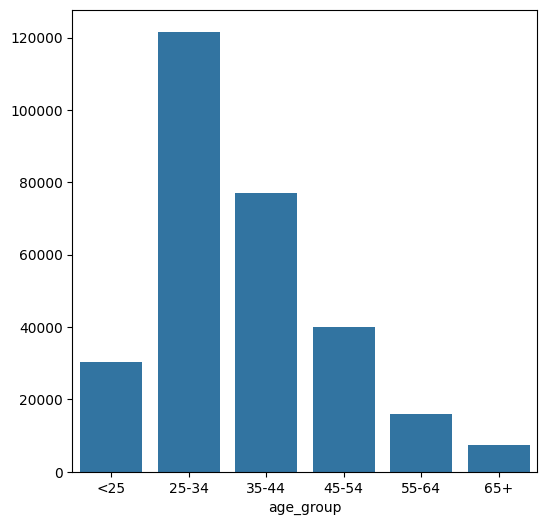

In [89]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=players_clean['age_group'].value_counts().index,y=players_clean['age_group'].value_counts().values)
plt.show()

In [90]:
age_gender_split = players_clean.groupby(['age_group','gender'])['src_player_id'].count()
print(age_gender_split)

age_group  gender
<25        F          5938
           M         24266
25-34      F         29341
           M         92262
35-44      F         17500
           M         59540
45-54      F         10510
           M         29543
55-64      F          5097
           M         10913
65+        F          2873
           M          4505
Name: src_player_id, dtype: int64


<ipython-input-90-3368b6e39c47>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_split = players_clean.groupby(['age_group','gender'])['src_player_id'].count()


In [92]:
age_gender_split = age_gender_split.unstack()
print(age_gender_split)

gender        F      M 
age_group              
<25         5938  24266
25-34      29341  92262
35-44      17500  59540
45-54      10510  29543
55-64       5097  10913
65+         2873   4505


Text(0.5, 1.0, 'Players by age and gender')

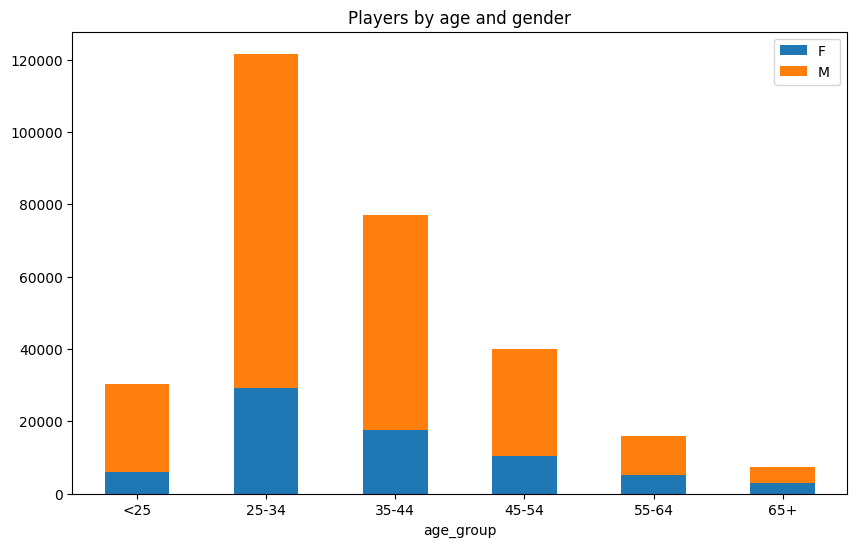

In [93]:
age_gender_split.plot(kind='bar',stacked=True,figsize=(10,6))
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.title('Players by age and gender')

## Acquisition channel split

In [ ]:
acq_channel_split = df_player.groupby(['acquisition_channel','gender'])['src_player_id'].count()
print(acq_channel_split)

In [ ]:
acq_channel_split = acq_channel_split.unstack(fill_value=0)
print(acq_channel_split)

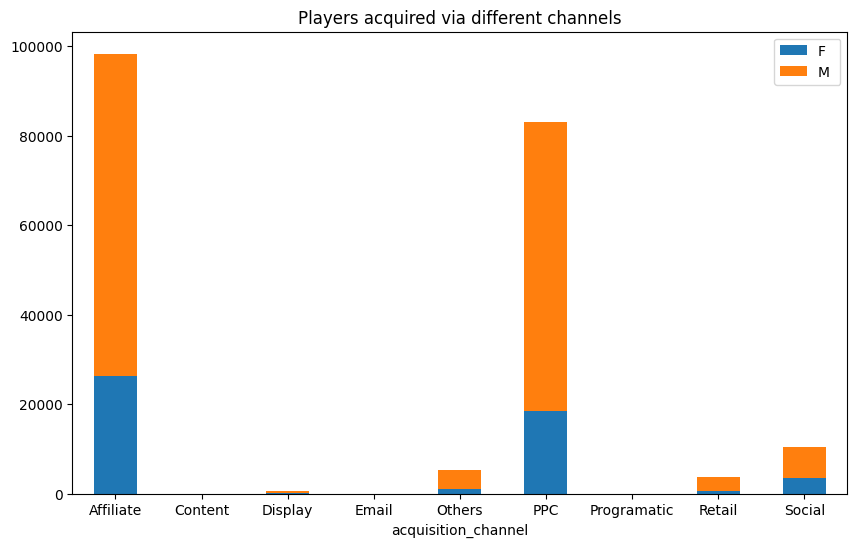

In [ ]:
acq_channel_split.plot(kind='bar',stacked=True,figsize=(10,6))
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.title('Players acquired via different channels')
plt.show()

## Players by product

In [252]:
player_by_product = df_activity['product'].value_counts()

### Sportsbook is the most popular betting product among all the users while very few have opted for In venue gaming(IVG)

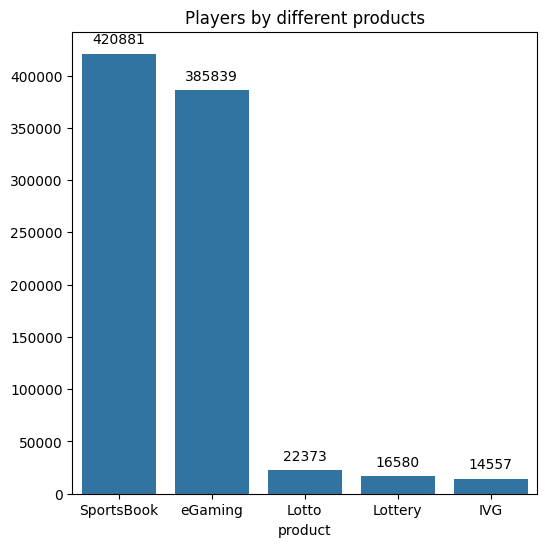

In [254]:
plt.figure(figsize=(6,6))
ax = sns.barplot(x=player_by_product.index,y=player_by_product.values)
plt.title('Players by different products')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

## Players by product and sub product

In Sportsbook- Prematch betting is more popular among players than Live betting.

In eGaming products - Slot machines are preferred more than the table games.

In [ ]:
player_by_prod_sub_prod = df_activity.groupby(['product','sub_product'])['src_player_id'].count()
print(player_by_prod_sub_prod)

product     sub_product    
IVG         IVG                 14557
Lottery     Lucky Six           12317
            LuckyX               2723
            Next Six             1540
Lotto       Lotto               22373
SportsBook  Livebook           170336
            Prematch           250545
eGaming     Non Table Games    338054
            Table Games         47785
Name: src_player_id, dtype: int64


In [ ]:
player_by_prod_sub_prod = player_by_prod_sub_prod.unstack()

Text(0.5, 1.0, 'Players by product and sub product')

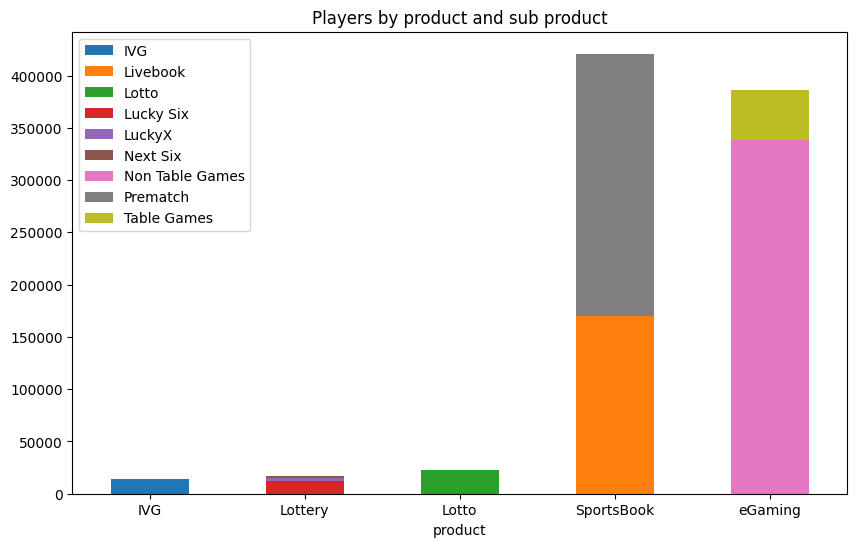

In [ ]:
player_by_prod_sub_prod.plot(kind='bar',stacked=True,figsize=(10,6))
plt.legend(loc='best')
plt.xticks(rotation=0)
plt.title('Players by product and sub product')

## Lets see product usage by gender.
Popular product among females and popular product among males.

In [ ]:
merged_df = df_activity.merge(players_clean,on='src_player_id')
print(merged_df.head())

   src_player_id activity_month     product      sub_product  \
0       16585649     2020-08-31  SportsBook         Livebook   
1       12845036     2019-05-31  SportsBook         Prematch   
2       12720869     2021-06-30     eGaming  Non Table Games   
3       18979743     2021-02-28     eGaming  Non Table Games   
4       12580168     2020-12-31     eGaming  Non Table Games   

   active_player_days  bet_amount  win_amount  gross_win  net_gross_win  \
0                   1      500.00        0.00   500.0000     420.000000   
1                  28     1229.48     1177.85    41.6300      34.969200   
2                   1       73.40       46.20    27.2000      22.848000   
3                   1       52.00       21.70    30.3000      25.452000   
4                   1       74.00       54.60    18.6674      15.680616   

          signup_date acquisition_channel  src_advertiser_id gender  \
0 2020-08-06 12:27:56                 PPC           129135.0     F    
1 2019-04-20 22:05:39 

In [ ]:
product_by_gender = merged_df.groupby(['gender','product'])['src_player_id'].count()
print(product_by_gender)

gender  product   
F       IVG             1940
        Lottery         3614
        Lotto           4581
        SportsBook     51052
        eGaming        75284
M       IVG            12617
        Lottery        12966
        Lotto          17792
        SportsBook    369829
        eGaming       310555
Name: src_player_id, dtype: int64


In [ ]:
product_by_gender = product_by_gender.unstack()
print(product_by_gender)

product    IVG  Lottery  Lotto  SportsBook  eGaming
gender                                             
F         1940     3614   4581       51052    75284
M        12617    12966  17792      369829   310555


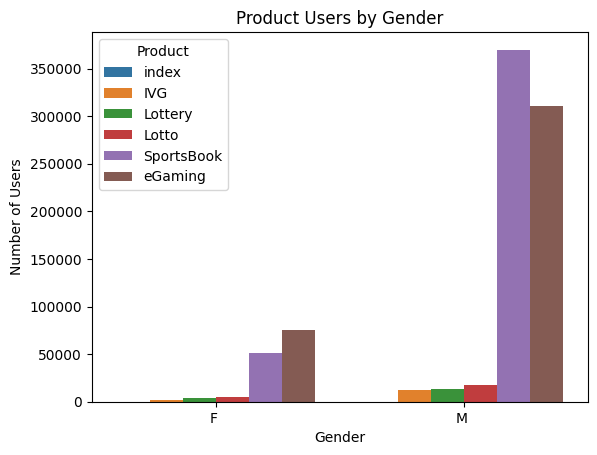

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


product_by_gender_melted = pd.melt(product_by_gender.reset_index(), id_vars=['gender'], var_name='product', value_name='count')

ax = sns.barplot(x='gender', y='count', hue='product', data=product_by_gender_melted)

plt.title('Product Users by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)

plt.legend(title='Product')

plt.show()

## RFM Analysis on these customers


Recency	How recently a player was active (placed a bet)	ActivityMonth or System_First_Bet_Datetime


Frequency	How often a player has been active (e.g., # active months, # sessions)	ActivePlayerDays, grouped by player


Monetary	How much value the player has brought	Net Gross Revenue (NGR) or Net_Gross_Win

In [ ]:
df_bonus.head()

,src_player_id,activity_month,product,bonus_cost
0,16051927,2020-06-30,eGaming,50.0
1,19309540,2021-02-28,eGaming,40.0
2,13176431,2020-01-31,eGaming,15.0
3,12405628,2019-02-28,SportsBook,30.0
4,17486248,2021-02-28,eGaming,25.0


In [255]:
df_activity.head()

,src_player_id,activity_month,product,sub_product,active_player_days,bet_amount,win_amount,gross_win,net_gross_win
0,16585649,2020-08-31,SportsBook,Livebook,1,500.00,0.00,500.0000,420.000000
1,12845036,2019-05-31,SportsBook,Prematch,28,1229.48,1177.85,41.6300,34.969200
2,12720869,2021-06-30,eGaming,Non Table Games,1,73.40,46.20,27.2000,22.848000
3,18979743,2021-02-28,eGaming,Non Table Games,1,52.00,21.70,30.3000,25.452000
4,12580168,2020-12-31,eGaming,Non Table Games,1,74.00,54.60,18.6674,15.680616


Based on the last activity month from the dataset, we will use that as the reference date to calculate recency for each player.

In [40]:
max_activity_date = df_activity['activity_month'].max()
print(max_activity_date)

2021-06-30 00:00:00


In [41]:
last_activity = df_activity.groupby('src_player_id')['activity_month'].max().reset_index()
print(last_activity.head())

   src_player_id activity_month
0       12329393     2019-01-31
1       12329407     2019-01-31
2       12329630     2019-01-31
3       12329932     2019-01-31
4       12329942     2019-01-31


In [42]:
last_activity.rename(columns={'activity_month':'last_activity_date'},inplace=True)
print(last_activity.head())

   src_player_id last_activity_date
0       12329393         2019-01-31
1       12329407         2019-01-31
2       12329630         2019-01-31
3       12329932         2019-01-31
4       12329942         2019-01-31


In [158]:
last_activity['recency'] = (max_activity_date.to_period('M') - last_activity['last_activity_date'].dt.to_period('M')).apply(attrgetter('n'))
print(last_activity.head())

   src_player_id last_activity_date  recency
0       12329393         2019-01-31       29
1       12329407         2019-01-31       29
2       12329630         2019-01-31       29
3       12329932         2019-01-31       29
4       12329942         2019-01-31       29


In [48]:
print(last_activity.head())

   src_player_id last_activity_date  recency
0       12329393         2019-01-31       29
1       12329407         2019-01-31       29
2       12329630         2019-01-31       29
3       12329932         2019-01-31       29
4       12329942         2019-01-31       29


Calculating frequency - Number of total active months

In [49]:
active_months = df_activity.groupby('src_player_id')['activity_month'].nunique().reset_index()
active_months.rename(columns={'activity_month':'active_months'},inplace=True)
print(active_months.head())

   src_player_id  active_months
0       12329393              1
1       12329407              1
2       12329630              1
3       12329932              1
4       12329942              1


Calculating Monetary

Total money spent by a player is the total bet amount.

In [67]:
total_bet_per_player = df_activity.groupby(['src_player_id'])['bet_amount'].sum().reset_index()
print(total_bet_per_player.head())

   src_player_id  bet_amount
0       12329393         0.0
1       12329407        63.0
2       12329630        76.5
3       12329932        26.0
4       12329942       100.0


In [68]:
rfm = total_bet_per_player.merge(active_months,on='src_player_id')
print(rfm.head())

   src_player_id  bet_amount  active_months
0       12329393         0.0              1
1       12329407        63.0              1
2       12329630        76.5              1
3       12329932        26.0              1
4       12329942       100.0              1


In [69]:
rfm = rfm.merge(last_activity,on='src_player_id')
print(rfm.head())

   src_player_id  bet_amount  active_months last_activity_date  recency
0       12329393         0.0              1         2019-01-31       29
1       12329407        63.0              1         2019-01-31       29
2       12329630        76.5              1         2019-01-31       29
3       12329932        26.0              1         2019-01-31       29
4       12329942       100.0              1         2019-01-31       29


In [70]:
rfm = rfm[['src_player_id','recency','active_months','bet_amount']]
print(rfm.head())

   src_player_id  recency  active_months  bet_amount
0       12329393       29              1         0.0
1       12329407       29              1        63.0
2       12329630       29              1        76.5
3       12329932       29              1        26.0
4       12329942       29              1       100.0


In [71]:
rfm.rename(columns={'active_months':'frequency','bet_amount':'monetary'},inplace=True)
print(rfm.head())

   src_player_id  recency  frequency  monetary
0       12329393       29          1       0.0
1       12329407       29          1      63.0
2       12329630       29          1      76.5
3       12329932       29          1      26.0
4       12329942       29          1     100.0


In [72]:
rfm[['frequency','recency','monetary']].describe()

,frequency,recency,monetary
count,167327.000000,167327.000000,1.673270e+05
mean,2.776300,11.458802,1.731971e+04
std,3.926248,8.859653,1.567284e+05
min,1.000000,0.000000,0.000000e+00
25%,1.000000,3.000000,7.485500e+01
50%,1.000000,11.000000,4.939100e+02
75%,2.000000,18.000000,3.597885e+03
max,30.000000,29.000000,1.782643e+07


<Axes: xlabel='monetary', ylabel='Count'>

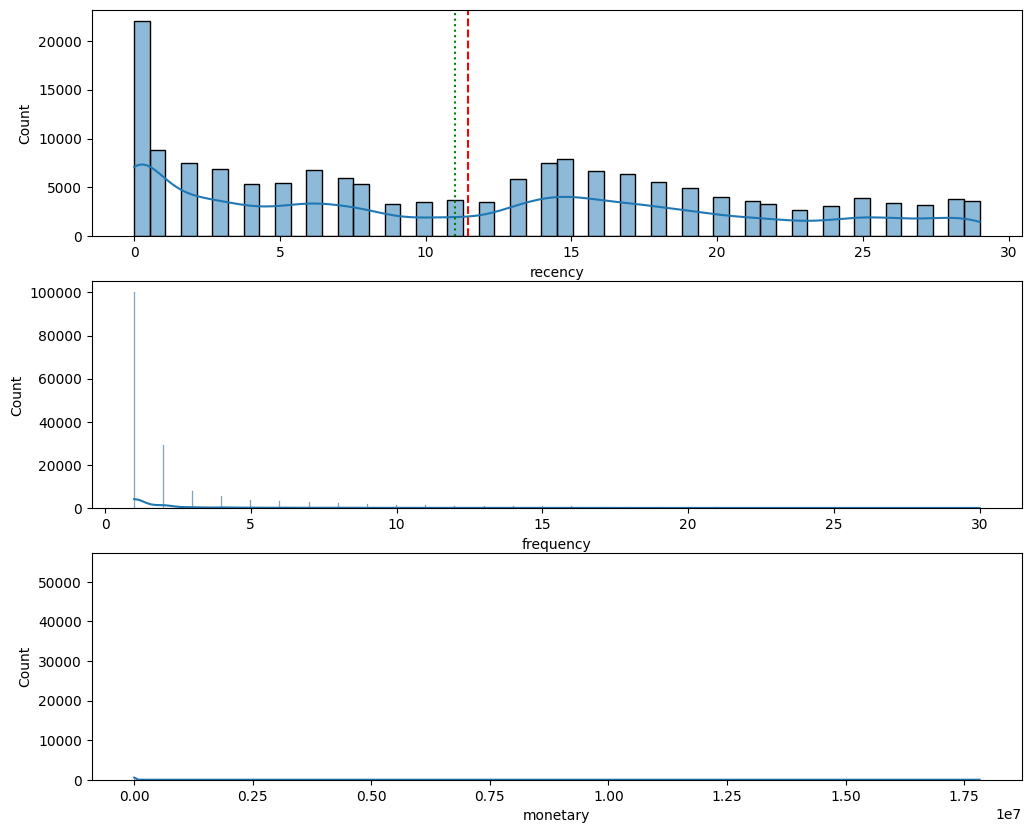

In [73]:
plt.figure(figsize=(12,10))


plt.subplot(3, 1, 1);
sns.histplot(rfm['recency'],kde=True)
plt.axvline(rfm['recency'].mean(), color='red', linestyle='dashed', label='Mean')
plt.axvline(rfm['recency'].median(), color='green', linestyle='dotted', label='Median')

plt.subplot(3, 1, 2);
sns.histplot(rfm['frequency'],kde=True)

plt.subplot(3, 1, 3);
sns.histplot(rfm['monetary'],kde=True)

K means clustering on RFM data

In [77]:
import numpy as np

rfm_log = rfm.copy()
rfm_log[['recency', 'frequency', 'monetary']] = np.log1p(rfm_log[['recency', 'frequency', 'monetary']])


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log[['recency', 'frequency', 'monetary']])


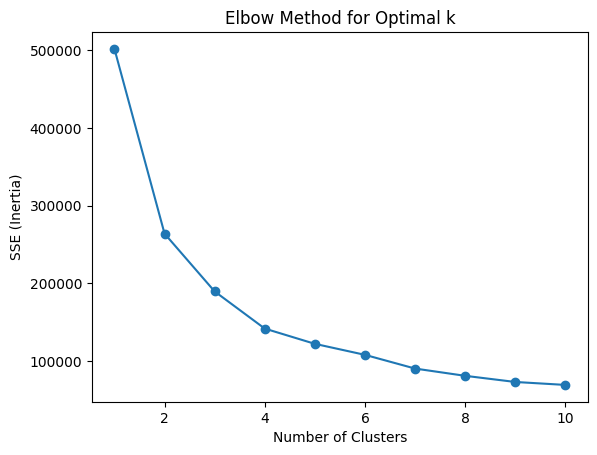

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [80]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=1)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

In [81]:
rfm.groupby('cluster').agg({
    'recency': ['mean', 'median'],
    'frequency': ['mean', 'median'],
    'monetary': ['mean', 'median'],
    'src_player_id': 'count'
}).rename(columns={'src_player_id': 'count'})


recency         frequency             monetary            count
              mean median       mean median          mean    median  count
cluster                                                                   
0        15.073353   15.0   1.626455    1.0   5936.945876   1012.90  61947
1         1.704158    2.0   1.699668    1.0   5956.029180    933.40  29847
2        17.308311   17.0   1.102679    1.0     41.977459     27.50  50955
3         2.067255    0.0  10.451583    9.0  95629.018816  17381.89  24578

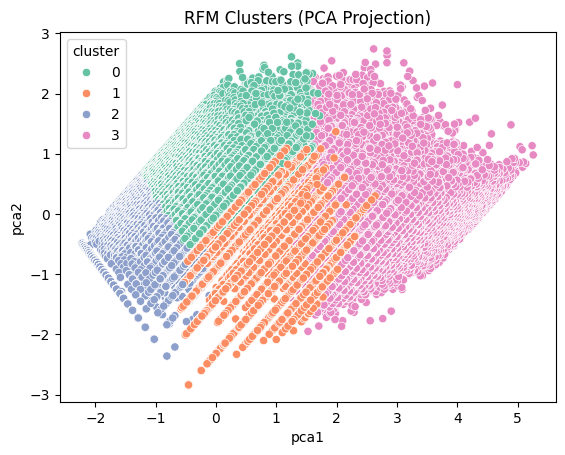

In [84]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(rfm_scaled)
rfm['pca1'] = pca_features[:, 0]
rfm['pca2'] = pca_features[:, 1]

sns.scatterplot(data=rfm, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('RFM Clusters (PCA Projection)')
plt.show()

In [86]:
rfm['cluster'] = rfm['cluster'].astype(int)
rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].mean().round(2)


,recency,frequency,monetary
cluster,,,
0,15.07,1.63,5936.95
1,1.70,1.70,5956.03
2,17.31,1.10,41.98
3,2.07,10.45,95629.02


## Based on these clusters' RFM score, we have identified 4 main categories of players :

High Value Loyalists(Cluster 3) : Low recency, high frequency, high monetary.

At-Risk Players(Cluster 0)/Lapsed Players(Cluster 2): High recency, low frequency and low-mid monetary.

New Players(Cluster 1) : Low recency, low frequency, low- mid monetary.

## **COHORT ANALYSIS**

By doing this analysis, we can answer questions like:

1. How many users placed their first bet within 1, 7, or 30 days of signing up?

2. Which signup cohorts have the highest conversion to betting?

3. How long does it typically take for a user to place their first bet?

4. Are recent cohorts retaining better or worse than older ones?

Lets do cohort analysis.

Calculate retention rate - Out of all the users who signed up, when did they make their first bet.

In [137]:
players_clean.head()

,src_player_id,signup_date,acquisition_channel,src_advertiser_id,gender,date_of_birth,internal_player_yn,age
0,12584958,2019-02-23 17:24:49,NaN,999999.0,M,1991-08-05,N,34
1,12356925,2019-01-07 15:57:11,NaN,999999.0,M,1993-09-09,N,32
2,12500831,2019-02-10 08:31:13,NaN,999999.0,M,1971-10-15,N,54
3,12660009,2019-03-12 09:42:53,NaN,999999.0,M,2000-12-15,N,25
4,12447120,2019-01-28 09:53:42,NaN,999999.0,M,1994-03-07,N,31


In [139]:
merged = players_clean.merge(df_bet,on='src_player_id',how='left')
print(merged.head())

   src_player_id         signup_date acquisition_channel  src_advertiser_id  \
0       12584958 2019-02-23 17:24:49                 NaN           999999.0   
1       12356925 2019-01-07 15:57:11                 NaN           999999.0   
2       12500831 2019-02-10 08:31:13                 NaN           999999.0   
3       12660009 2019-03-12 09:42:53                 NaN           999999.0   
4       12447120 2019-01-28 09:53:42                 NaN           999999.0   

  gender date_of_birth internal_player_yn  age system_first_bet_datetime  \
0     M     1991-08-05                 N    34                       NaT   
1     M     1993-09-09                 N    32                       NaT   
2     M     1971-10-15                 N    54                       NaT   
3     M     2000-12-15                 N    25                       NaT   
4     M     1994-03-07                 N    31                       NaT   

   system_first_betslip_amt system_first_bet_product_group  \
0     

In [140]:
cohort = merged[['src_player_id','signup_date','system_first_bet_datetime']]
print(cohort.head())

   src_player_id         signup_date system_first_bet_datetime
0       12584958 2019-02-23 17:24:49                       NaT
1       12356925 2019-01-07 15:57:11                       NaT
2       12500831 2019-02-10 08:31:13                       NaT
3       12660009 2019-03-12 09:42:53                       NaT
4       12447120 2019-01-28 09:53:42                       NaT


In [141]:
cohort['signup_month'] = cohort['signup_date'].dt.to_period('M')
cohort['days_to_first_bet'] = (cohort['system_first_bet_datetime'] - cohort['signup_date']).dt.days
print(cohort.head())

   src_player_id         signup_date system_first_bet_datetime signup_month  \
0       12584958 2019-02-23 17:24:49                       NaT      2019-02   
1       12356925 2019-01-07 15:57:11                       NaT      2019-01   
2       12500831 2019-02-10 08:31:13                       NaT      2019-02   
3       12660009 2019-03-12 09:42:53                       NaT      2019-03   
4       12447120 2019-01-28 09:53:42                       NaT      2019-01   

   days_to_first_bet  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  


<ipython-input-141-12278364ec0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['signup_month'] = cohort['signup_date'].dt.to_period('M')
<ipython-input-141-12278364ec0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['days_to_first_bet'] = (cohort['system_first_bet_datetime'] - cohort['signup_date']).dt.days


In [142]:
cohort['days_to_first_bet'].describe()

,days_to_first_bet
count,159166.000000
mean,19.609734
std,80.291378
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,911.000000


In [143]:
labels = ['same_day','1-7days','8-30 days','30+days']
cohort['retention_bucket'] = pd.cut(cohort['days_to_first_bet'],bins=[-1,0,7,30,911],labels = labels)
cohort['retention_bucket'] = cohort['retention_bucket'].cat.add_categories(['Never Bet']).fillna('Never Bet')
print(cohort.head())

   src_player_id         signup_date system_first_bet_datetime signup_month  \
0       12584958 2019-02-23 17:24:49                       NaT      2019-02   
1       12356925 2019-01-07 15:57:11                       NaT      2019-01   
2       12500831 2019-02-10 08:31:13                       NaT      2019-02   
3       12660009 2019-03-12 09:42:53                       NaT      2019-03   
4       12447120 2019-01-28 09:53:42                       NaT      2019-01   

   days_to_first_bet retention_bucket  
0                NaN        Never Bet  
1                NaN        Never Bet  
2                NaN        Never Bet  
3                NaN        Never Bet  
4                NaN        Never Bet  


<ipython-input-143-5f7d8980d565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['retention_bucket'] = pd.cut(cohort['days_to_first_bet'],bins=[-1,0,7,30,911],labels = labels)
<ipython-input-143-5f7d8980d565>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cohort['retention_bucket'] = cohort['retention_bucket'].cat.add_categories(['Never Bet']).fillna('Never Bet')


In [146]:
temp = cohort.groupby(['signup_month','retention_bucket'])['src_player_id'].count()
print(temp)

signup_month  retention_bucket
2019-01       same_day            4117
              1-7days              551
              8-30 days            223
              30+days              769
              Never Bet           5045
                                  ... 
2021-07       same_day            1288
              1-7days              221
              8-30 days              6
              30+days                0
              Never Bet           2224
Name: src_player_id, Length: 155, dtype: int64


<ipython-input-146-ac83ffebdc9a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp = cohort.groupby(['signup_month','retention_bucket'])['src_player_id'].count()


In [ ]:
temp = temp.unstack()
print(temp)

In [151]:
temp['Total'] = temp.sum(axis=1)
cohort_percent = temp.div(temp['Total'], axis=0) * 100

In [ ]:
print(cohort_percent)

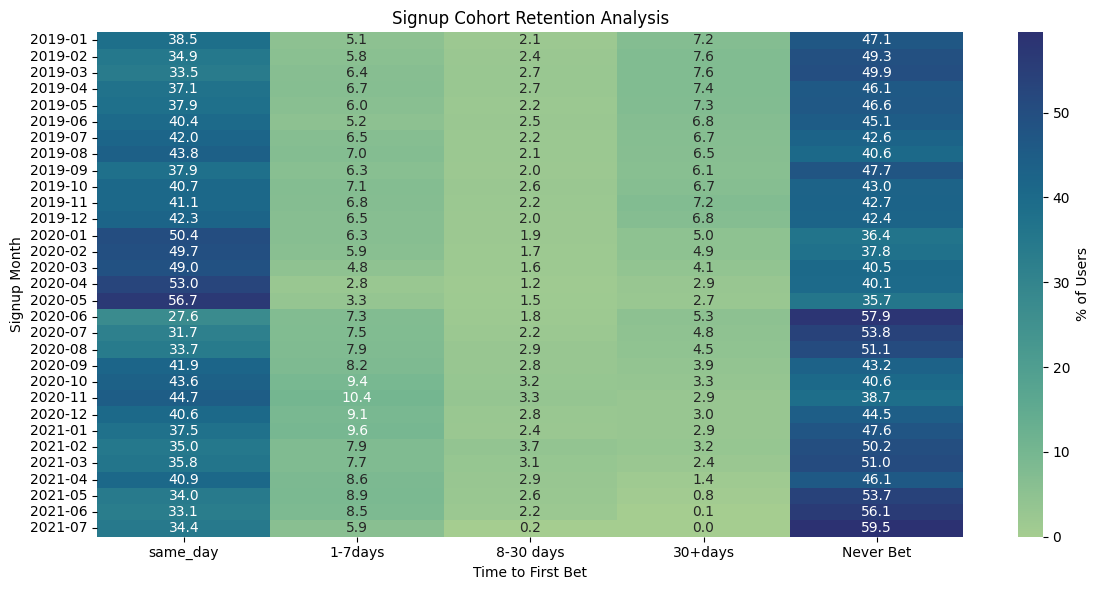

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns


cohort_plot = cohort_percent.drop(columns='Total', errors='ignore')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_plot, annot=True, fmt=".1f", cmap="crest", cbar_kws={'label': '% of Users'})

plt.title("Signup Cohort Retention Analysis")
plt.xlabel("Time to First Bet")
plt.ylabel("Signup Month")
plt.tight_layout()
plt.show()


same_day: Users who placed their first bet on the same day as signup.

1–7days: First bet occurred within 1–7 days.

8–30days and 30+days: Gradually delayed betting.

Never Bet: Users who signed up but never placed a bet.

Insights from this signup retention map:
1. High Same-Day Conversion in Many Cohorts

Several cohorts (e.g., 2020-03, 2020-05, 2020-07) show >50% same-day betting.

These months may have had successful onboarding flows, promotions, or events driving immediate betting behavior.

2. Significant Drop in Same-Day Conversions in June 2020

June 2020 has only 27.6% same-day conversion and the highest "Never Bet" rate (57.9%).

This suggests a sudden drop in effectiveness of onboarding or acquisition quality during that month.

3. Never Bet % Consistently High (~40–50%)

Across most months, ~40–50% of users never placed a bet.

This indicates room for improvement:

Onboarding nudges.

Activation bonuses.

Product experience.

4. 1–7 Days Segment Is Growing in Later Cohorts

Later months (e.g., 2020-11 to 2021-03) show growing percentages in 1–7 day buckets (up to 10%+).

Suggests a trend of users delaying their first bet.

5. Low Delayed Conversion (8–30 or 30+ days)

Very few users wait >7 days to place their first bet.
So if users don’t convert in the first week, they likely never convert



## Retention analyis based on signup channel/platform

In [231]:
players_clean.head()

,src_player_id,signup_date,acquisition_channel,src_advertiser_id,gender,date_of_birth,internal_player_yn,age
0,12584958,2019-02-23 17:24:49,NaN,999999.0,M,1991-08-05,N,34
1,12356925,2019-01-07 15:57:11,NaN,999999.0,M,1993-09-09,N,32
2,12500831,2019-02-10 08:31:13,NaN,999999.0,M,1971-10-15,N,54
3,12660009,2019-03-12 09:42:53,NaN,999999.0,M,2000-12-15,N,25
4,12447120,2019-01-28 09:53:42,NaN,999999.0,M,1994-03-07,N,31


In [232]:
temp = players_clean[players_clean['acquisition_channel'].notna()]
print(temp.head())

      src_player_id         signup_date acquisition_channel  \
966        20599646 2021-06-21 17:19:19                 PPC   
968        18786167 2021-01-16 15:38:37                 PPC   
1003       19209465 2021-02-19 14:06:47                 PPC   
1009       19537959 2021-03-16 23:32:11                 PPC   
1010       20572358 2021-06-19 10:52:10                 PPC   

      src_advertiser_id gender date_of_birth internal_player_yn  age  
966            129135.0     M     1996-12-04                 N    29  
968            129135.0     F     1986-01-20                 N    39  
1003           129135.0     M     1973-11-13                 N    52  
1009           129135.0     M     1992-11-09                 N    33  
1010           129135.0     F     1987-12-07                 N    38  


In [233]:
merged = temp.merge(df_bet,on='src_player_id',how='left')
print(merged.head())

   src_player_id         signup_date acquisition_channel  src_advertiser_id  \
0       20599646 2021-06-21 17:19:19                 PPC           129135.0   
1       18786167 2021-01-16 15:38:37                 PPC           129135.0   
2       19209465 2021-02-19 14:06:47                 PPC           129135.0   
3       19537959 2021-03-16 23:32:11                 PPC           129135.0   
4       20572358 2021-06-19 10:52:10                 PPC           129135.0   

  gender date_of_birth internal_player_yn  age system_first_bet_datetime  \
0     M     1996-12-04                 N    29                       NaT   
1     F     1986-01-20                 N    39                       NaT   
2     M     1973-11-13                 N    52                       NaT   
3     M     1992-11-09                 N    33                       NaT   
4     F     1987-12-07                 N    38                       NaT   

   system_first_betslip_amt system_first_bet_product_group  \
0     

In [234]:
merged['signup_month'] = merged['signup_date'].dt.to_period('M')
merged['days_to_first_bet'] = (merged['system_first_bet_datetime'] - merged['signup_date']).dt.days
print(merged.head())

   src_player_id         signup_date acquisition_channel  src_advertiser_id  \
0       20599646 2021-06-21 17:19:19                 PPC           129135.0   
1       18786167 2021-01-16 15:38:37                 PPC           129135.0   
2       19209465 2021-02-19 14:06:47                 PPC           129135.0   
3       19537959 2021-03-16 23:32:11                 PPC           129135.0   
4       20572358 2021-06-19 10:52:10                 PPC           129135.0   

  gender date_of_birth internal_player_yn  age system_first_bet_datetime  \
0     M     1996-12-04                 N    29                       NaT   
1     F     1986-01-20                 N    39                       NaT   
2     M     1973-11-13                 N    52                       NaT   
3     M     1992-11-09                 N    33                       NaT   
4     F     1987-12-07                 N    38                       NaT   

   system_first_betslip_amt system_first_bet_product_group  \
0     

In [235]:
channel_cohort = merged[['src_player_id','signup_month','acquisition_channel','days_to_first_bet']]
print(channel_cohort.head())

   src_player_id signup_month acquisition_channel  days_to_first_bet
0       20599646      2021-06                 PPC                NaN
1       18786167      2021-01                 PPC                NaN
2       19209465      2021-02                 PPC                NaN
3       19537959      2021-03                 PPC                NaN
4       20572358      2021-06                 PPC                NaN


In [236]:
channel_cohort['days_to_first_bet'].describe()

,days_to_first_bet
count,105691.000000
mean,21.270562
std,85.218757
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,911.000000


In [237]:
labels = ['same_day','1-7days','8-30 days','30+days']
channel_cohort['retention_bucket'] = pd.cut(channel_cohort['days_to_first_bet'],bins=[-1,0,7,30,911],labels = labels)
channel_cohort['retention_bucket'] = channel_cohort['retention_bucket'].cat.add_categories(['Never Bet']).fillna('Never Bet')
print(channel_cohort.head())

   src_player_id signup_month acquisition_channel  days_to_first_bet  \
0       20599646      2021-06                 PPC                NaN   
1       18786167      2021-01                 PPC                NaN   
2       19209465      2021-02                 PPC                NaN   
3       19537959      2021-03                 PPC                NaN   
4       20572358      2021-06                 PPC                NaN   

  retention_bucket  
0        Never Bet  
1        Never Bet  
2        Never Bet  
3        Never Bet  
4        Never Bet  


<ipython-input-237-9b6ff046982f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_cohort['retention_bucket'] = pd.cut(channel_cohort['days_to_first_bet'],bins=[-1,0,7,30,911],labels = labels)
<ipython-input-237-9b6ff046982f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  channel_cohort['retention_bucket'] = channel_cohort['retention_bucket'].cat.add_categories(['Never Bet']).fillna('Never Bet')


In [238]:
channel_cohort = channel_cohort.groupby(['acquisition_channel','retention_bucket'])['src_player_id'].count()
print(channel_cohort)

acquisition_channel  retention_bucket
Affiliate            same_day            43249
                     1-7days              5903
                     8-30 days            1696
                     30+days              3688
                     Never Bet           43643
Content              same_day                0
                     1-7days                 0
                     8-30 days               0
                     30+days                 0
                     Never Bet               1
Display              same_day              169
                     1-7days                38
                     8-30 days               9
                     30+days                22
                     Never Bet             252
Email                same_day                1
                     1-7days                 0
                     8-30 days               0
                     30+days                 1
                     Never Bet               0
Others               s

<ipython-input-238-9a2fd449575e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  channel_cohort = channel_cohort.groupby(['acquisition_channel','retention_bucket'])['src_player_id'].count()


In [239]:
channel_cohort = channel_cohort.unstack()
print(channel_cohort)

retention_bucket     same_day  1-7days  8-30 days  30+days  Never Bet
acquisition_channel                                                  
Affiliate               43249     5903       1696     3688      43643
Content                     0        0          0        0          1
Display                   169       38          9       22        252
Email                       1        0          0        1          0
Others                   2301      531        159      449       1845
PPC                     30964     5962       2090     4242      39626
Programatic                 1        0          1        0          6
Retail                   1186      206         86      386       1825
Social                   1322      321        174      534       8157


In [240]:
channel_cohort['total'] = channel_cohort.sum(axis=1)
print(channel_cohort)

retention_bucket     same_day  1-7days  8-30 days  30+days  Never Bet  total
acquisition_channel                                                         
Affiliate               43249     5903       1696     3688      43643  98179
Content                     0        0          0        0          1      1
Display                   169       38          9       22        252    490
Email                       1        0          0        1          0      2
Others                   2301      531        159      449       1845   5285
PPC                     30964     5962       2090     4242      39626  82884
Programatic                 1        0          1        0          6      8
Retail                   1186      206         86      386       1825   3689
Social                   1322      321        174      534       8157  10508


In [244]:
channel_cohort_sorted = channel_cohort.sort_values(by='total',ascending=False)
print(channel_cohort_sorted)

retention_bucket     same_day  1-7days  8-30 days  30+days  Never Bet  total
acquisition_channel                                                         
Affiliate               43249     5903       1696     3688      43643  98179
PPC                     30964     5962       2090     4242      39626  82884
Social                   1322      321        174      534       8157  10508
Others                   2301      531        159      449       1845   5285
Retail                   1186      206         86      386       1825   3689
Display                   169       38          9       22        252    490
Programatic                 1        0          1        0          6      8
Email                       1        0          0        1          0      2
Content                     0        0          0        0          1      1


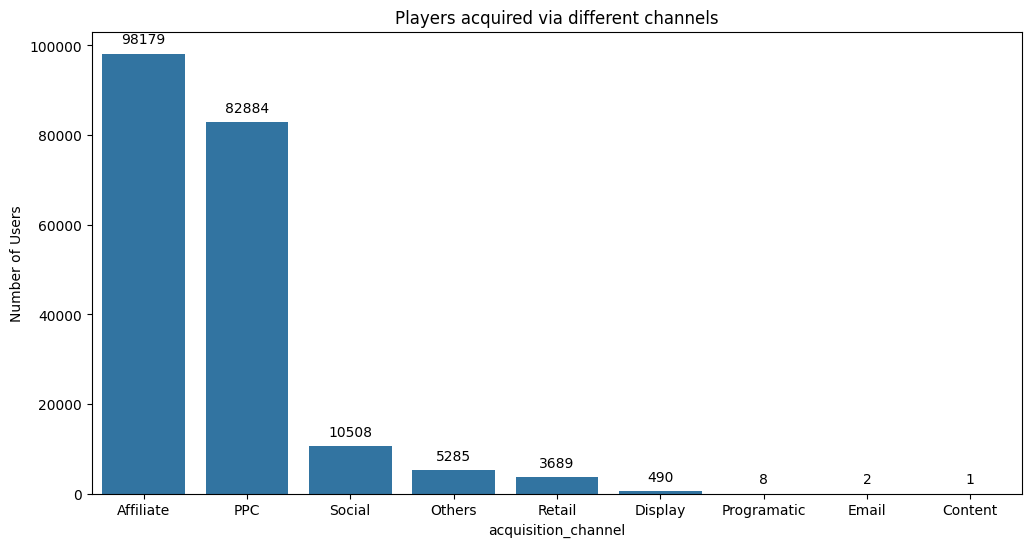

In [251]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=channel_cohort_sorted.index,y=channel_cohort_sorted.total)
plt.title('Players acquired via different channels')
plt.ylabel('Number of Users')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

We can remove "Content","Programatic" and "Email" from the analysis becuase the sample size is very small , 1 ,2 & 8 players, which is too small a sample for actionable insights.

When cohort sizes are very small, percentages can be misleading.

In [225]:
channel_cohort = channel_cohort.drop(index=['Content','Email','Programatic'])
print(channel_cohort)

retention_bucket     same_day  1-7days  8-30 days  30+days  Never Bet  total
acquisition_channel                                                         
Affiliate               43249     5903       1696     3688      43643  98179
Display                   169       38          9       22        252    490
Others                   2301      531        159      449       1845   5285
PPC                     30964     5962       2090     4242      39626  82884
Retail                   1186      206         86      386       1825   3689
Social                   1322      321        174      534       8157  10508


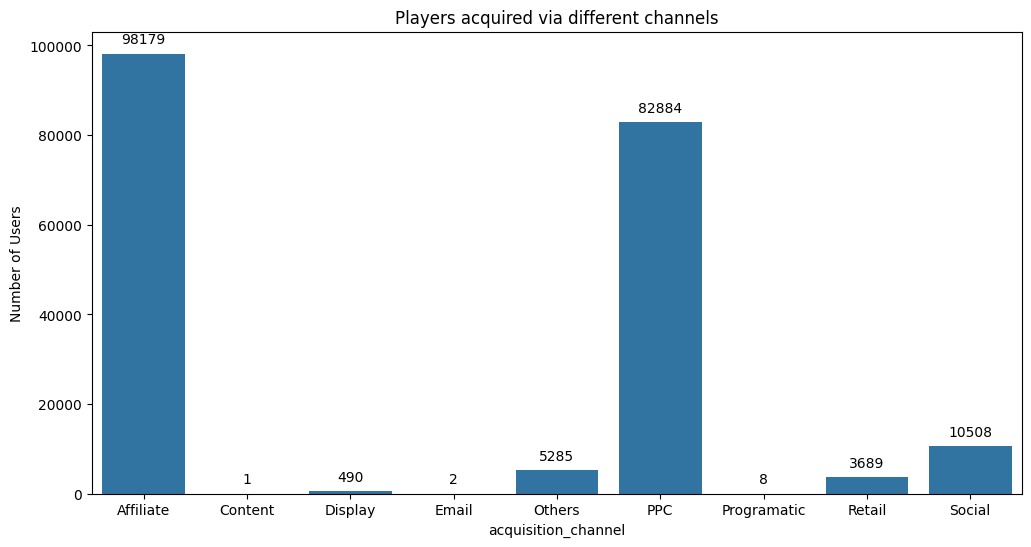

In [250]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=channel_cohort.index,y=channel_cohort.total)
plt.title('Players acquired via different channels')
plt.ylabel('Number of Users')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [227]:
channel_cohort_percent = channel_cohort.divide(channel_cohort['total'],axis=0) * 100
print(channel_cohort_percent)

retention_bucket      same_day    1-7days  8-30 days    30+days  Never Bet  \
acquisition_channel                                                          
Affiliate            44.051172   6.012487   1.727457   3.756404  44.452480   
Display              34.489796   7.755102   1.836735   4.489796  51.428571   
Others               43.538316  10.047304   3.008515   8.495743  34.910123   
PPC                  37.358236   7.193186   2.521596   5.117996  47.808986   
Retail               32.149634   5.584169   2.331255  10.463540  49.471401   
Social               12.580891   3.054815   1.655881   5.081842  77.626570   

retention_bucket     total  
acquisition_channel         
Affiliate            100.0  
Display              100.0  
Others               100.0  
PPC                  100.0  
Retail               100.0  
Social               100.0  


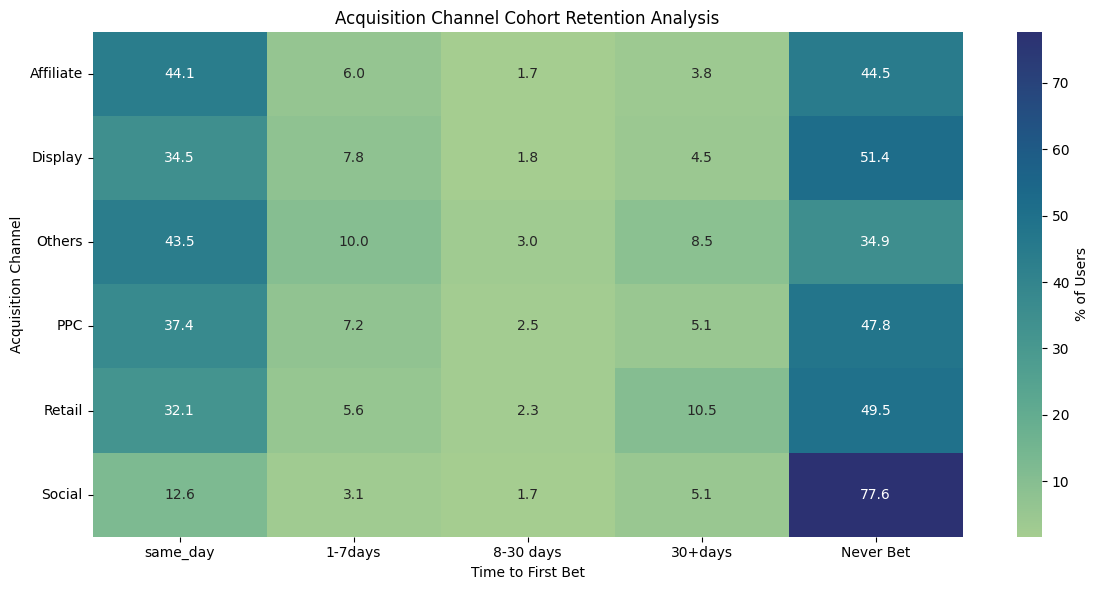

In [228]:

cohort_plot = channel_cohort_percent.drop(columns='total', errors='ignore')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cohort_plot, annot=True, fmt=".1f", cmap="crest", cbar_kws={'label': '% of Users'})

plt.title("Acquisition Channel Cohort Retention Analysis")
plt.xlabel("Time to First Bet")
plt.ylabel("Acquisition Channel")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Insights from this heatmap:

1. Affiliate:

44.1% bet same day, but also 44.5% never bet.
Mixed quality: some high-intent users but also many drop-offs.

2. PPC:

37.4% same-day bettors, but 47.8% never bet.
Expensive acquisition channel with questionable ROI. Worth reviewing the campaigns driving this.

3. Social:

High “Never Bet” % (75%+), very low same-day conversion.
Indicates very low-quality traffic or misalignment in targeting.

4. Display:

34.5% same-day bet rate, but over half (51.4%) never bet.
Another paid channel with a high drop-off. Could be optimised or paused.

5. Others & Retail:

Relatively balanced performance. These channels show slightly better long-term conversion with 8.5% & 10% betting after 30+ days.

## LTV analysis of players

Player life time value = Net gross revenue

For this LTV analysis , we will only consider users who have signed up until 2021 March because we dont have complete data for 2021(the most recent signup cohort is July 2021 and the most recent activity month is June 2021).

In [162]:
ltv_cohort = df_player[df_player['signup_date'].dt.to_period('M') <= '2021-03']
print(ltv_cohort.head())

   src_player_id         signup_date acquisition_channel  src_advertiser_id  \
0       12584958 2019-02-23 17:24:49                 NaN           999999.0   
1       12356925 2019-01-07 15:57:11                 NaN           999999.0   
2       12500831 2019-02-10 08:31:13                 NaN           999999.0   
3       12660009 2019-03-12 09:42:53                 NaN           999999.0   
4       12447120 2019-01-28 09:53:42                 NaN           999999.0   

  gender date_of_birth internal_player_yn  age  
0     M     1991-08-05                 N    34  
1     M     1993-09-09                 N    32  
2     M     1971-10-15                 N    54  
3     M     2000-12-15                 N    25  
4     M     1994-03-07                 N    31  


In [166]:
ltv_cohort = ltv_cohort.merge(df_activity,on='src_player_id',how='left')
print(ltv_cohort.head())

   src_player_id         signup_date acquisition_channel  src_advertiser_id  \
0       12584958 2019-02-23 17:24:49                 NaN           999999.0   
1       12356925 2019-01-07 15:57:11                 NaN           999999.0   
2       12500831 2019-02-10 08:31:13                 NaN           999999.0   
3       12660009 2019-03-12 09:42:53                 NaN           999999.0   
4       12447120 2019-01-28 09:53:42                 NaN           999999.0   

  gender date_of_birth internal_player_yn  age activity_month  product  \
0     M     1991-08-05                 N    34            NaT      NaN   
1     M     1993-09-09                 N    32            NaT      NaN   
2     M     1971-10-15                 N    54            NaT      NaN   
3     M     2000-12-15                 N    25            NaT      NaN   
4     M     1994-03-07                 N    31     2019-01-31  eGaming   

       sub_product  active_player_days  bet_amount  win_amount  gross_win  \
0  

In [167]:
gross_win_per_player = ltv_cohort.groupby(['src_player_id','activity_month'])['net_gross_win'].sum().reset_index()

In [168]:
merged = gross_win_per_player.merge(df_bonus,on=['src_player_id','activity_month'],how='left')

In [169]:
merged['bonus_cost'] = merged['bonus_cost'].fillna(0)
merged['net_gross_revenue'] = merged['net_gross_win'] - merged['bonus_cost']
print(merged.head())

   src_player_id activity_month  net_gross_win     product  bonus_cost  \
0       12329393     2019-01-31       0.000000         NaN        0.00   
1       12329407     2019-01-31      16.108092     eGaming       20.00   
2       12329630     2019-01-31      21.000000         NaN        0.00   
3       12329932     2019-01-31      16.037784     eGaming       19.35   
4       12329942     2019-01-31      84.000000  SportsBook       20.00   

   net_gross_revenue  
0           0.000000  
1          -3.891908  
2          21.000000  
3          -3.312216  
4          64.000000  


In [186]:
ltv_df = merged.groupby('src_player_id')['net_gross_revenue'].sum().reset_index()
print(ltv_df.head())

   src_player_id  net_gross_revenue
0       12329393           0.000000
1       12329407          -3.891908
2       12329630          21.000000
3       12329932          -3.312216
4       12329942          64.000000


In [187]:
ltv_df.rename(columns={'net_gross_revenue':'LTV'},inplace=True)
print(ltv_df.head())


   src_player_id        LTV
0       12329393   0.000000
1       12329407  -3.891908
2       12329630  21.000000
3       12329932  -3.312216
4       12329942  64.000000


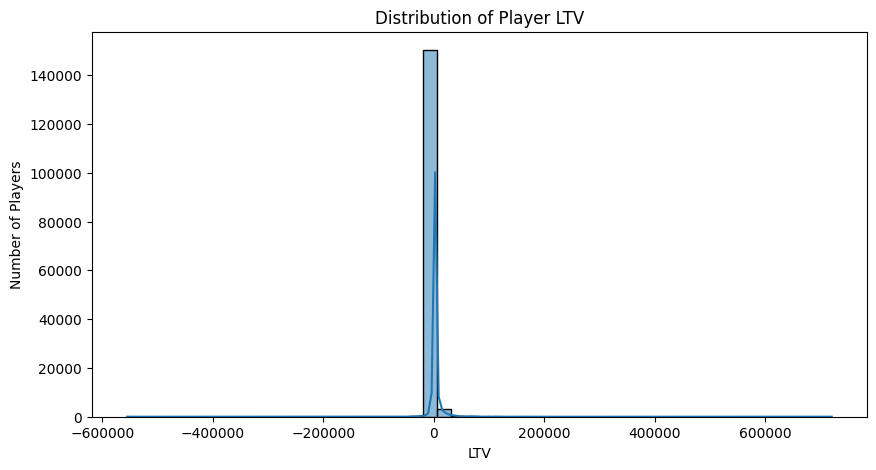

In [188]:
plt.figure(figsize=(10, 5))
sns.histplot(ltv_df['LTV'], bins=50, kde=True)
plt.title('Distribution of Player LTV')
plt.xlabel('LTV')
plt.ylabel('Number of Players')
plt.show()

In [189]:
#positive LTV means profitable customer, negative LTV means unprofitable customers
def customer_type(row):
  if row['LTV'] > 0:
    return 'profitable_customers'
  elif row['LTV'] < 0:
    return 'unprofitable_customers'
  else:
    return 'breakeven'

ltv_df['customer_type'] = ltv_df.apply(customer_type,axis=1)

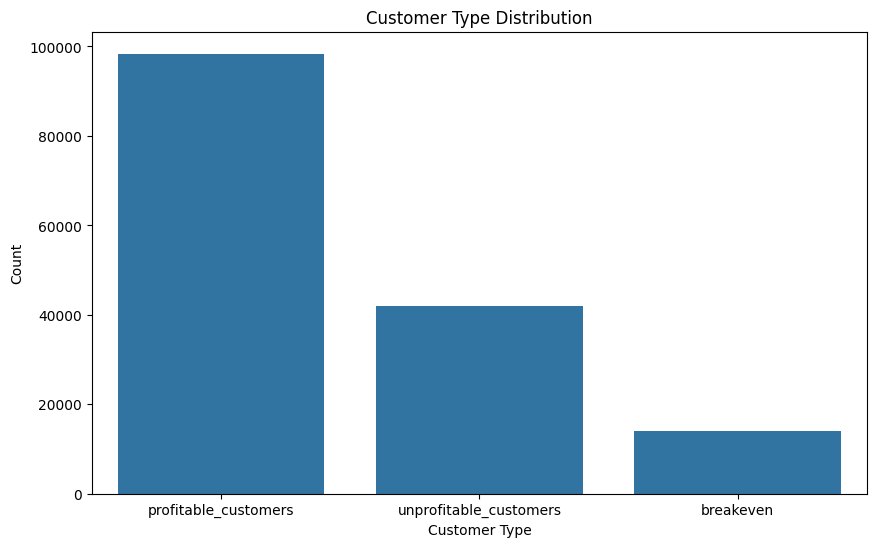

In [190]:
plt.figure(figsize=(10,6))
sns.barplot(x=ltv_df['customer_type'].value_counts().index,y=ltv_df['customer_type'].value_counts().values)
plt.title('Customer Type Distribution')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()